In [52]:
from sklearn.linear_model import SGDRegressor
import pandas as pd
import sys
import StringIO as sio
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing

# Case 1: In this case, only three features namely the lot area, year built, number of bedrooms above ground are used for training and Prediction

In [53]:
inp_train=pd.read_csv("train.csv")[['LotArea','OverallQual','OverallCond','YearBuilt','YearRemodAdd','2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','SalePrice']]
inp_train.dropna(axis=0, how='any',inplace=True)
print inp_train.shape

(1460, 16)


In [54]:
X_tr=[]
y_tr=[]
df=inp_train[['LotArea','YearBuilt','BedroomAbvGr','SalePrice']]
print df.shape
for i in range(1460):
    X_tr.append((df.iloc[i][0],df.iloc[i][1],df.iloc[i][2]))
    y_tr.append(df.iloc[i][3])

(1460, 4)


In [55]:
X_scaled = preprocessing.scale(X_tr)

In [56]:
sgdr=SGDRegressor(loss='squared_loss', fit_intercept=True, verbose=2)
sgdr.fit(X_scaled, y_tr)

-- Epoch 1
Norm: 47266.99, NNZs: 3, Bias: 173909.737514, T: 1460, Avg. loss: 3849522354.479981
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 48717.35, NNZs: 3, Bias: 180802.381241, T: 2920, Avg. loss: 2020047603.752572
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 47991.76, NNZs: 3, Bias: 180969.608848, T: 4380, Avg. loss: 2009270661.084242
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 46740.34, NNZs: 3, Bias: 180284.364838, T: 5840, Avg. loss: 2002347599.587503
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 49290.83, NNZs: 3, Bias: 181360.805984, T: 7300, Avg. loss: 2007192313.344374
Total training time: 0.00 seconds.


SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=None, n_iter=None, penalty='l2',
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=2,
       warm_start=False)

In [57]:
inp_test=pd.read_csv("test.csv")[['LotArea','OverallQual','OverallCond','YearBuilt','YearRemodAdd','2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd']]
inp_test.dropna(axis=0, how='any',inplace=True)
print inp_test.shape
df=inp_test[['LotArea','YearBuilt','BedroomAbvGr']]
print df.shape
X_tst=[]
for i in range(1457):
    X_tst.append((df.iloc[i][0:3]))

(1457, 15)
(1457, 3)


In [58]:
Xtst_scaled = preprocessing.scale(X_tst)
pred1=sgdr.predict(Xtst_scaled)

#  Case 2: In this case, 15 features are used for training and prediction

In [59]:
X_tr=[]
y_tr=[]
print inp_train.shape
for i in range(1460):
    X_tr.append((inp_train.iloc[i][0:14]))
    y_tr.append(inp_train.iloc[i][15])

(1460, 16)


In [60]:
X_scaled = preprocessing.scale(X_tr)
sgdr.fit(X_scaled, y_tr)

-- Epoch 1
Norm: 47568.60, NNZs: 14, Bias: 173345.581124, T: 1460, Avg. loss: 2656110638.109424
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 48047.06, NNZs: 14, Bias: 179884.835032, T: 2920, Avg. loss: 753579810.666804
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 50969.63, NNZs: 14, Bias: 180606.083009, T: 4380, Avg. loss: 722854340.938600
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 51671.22, NNZs: 14, Bias: 180154.544156, T: 5840, Avg. loss: 704378232.394793
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 54380.29, NNZs: 14, Bias: 181260.808786, T: 7300, Avg. loss: 706505208.503594
Total training time: 0.00 seconds.


SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=None, n_iter=None, penalty='l2',
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=2,
       warm_start=False)

In [61]:
print inp_test.shape
X_tst=[]
for i in range(1457):
    X_tst.append((inp_test.iloc[i][0:14]))

(1457, 15)


In [62]:
Xtst_scaled = preprocessing.scale(X_tst)
pred2=sgdr.predict(Xtst_scaled)

In [64]:
print len(pred1)
print len(pred2)

1457
1457


In [74]:
import matplotlib
matplotlib.rcParams['figure.figsize']=(18,16)

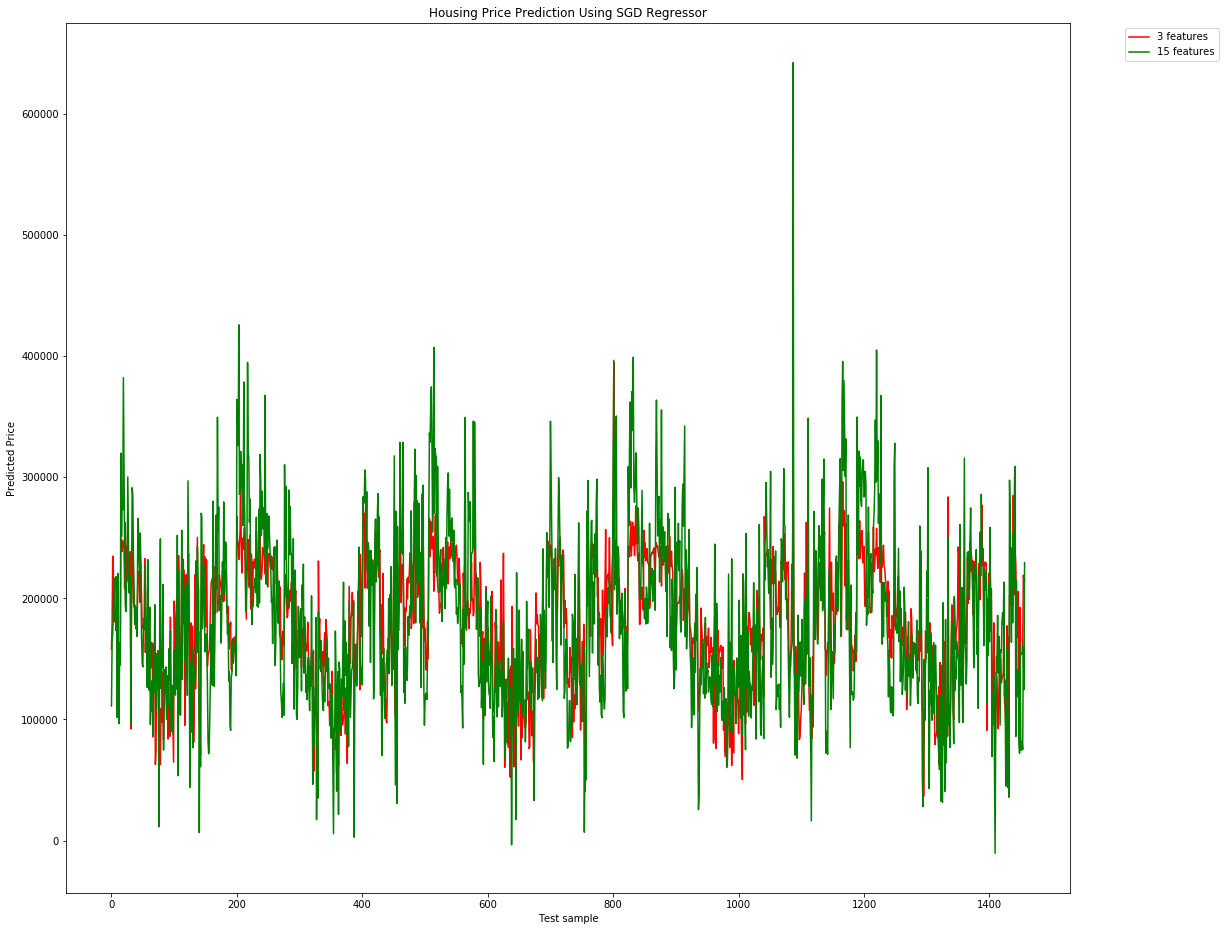

In [78]:
plt.plot(range(len(pred1)),pred1,'r', label='3 features')
plt.plot(range(len(pred2)),pred2,'g',label='15 features')
plt.xlabel('Test sample')
plt.ylabel('Predicted Price')
plt.title('Housing Price Prediction Using SGD Regressor')
plt.legend(bbox_to_anchor=(1.05, 1),loc=2)